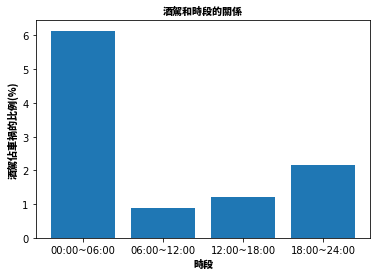

In [1]:
%matplotlib inline

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

myf = FontProperties(fname=r'/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc')

# 比較四個時段所發生的車禍中，酒駕所佔的比例為何

# 讀入台中市車禍事件
df = pd.read_csv("http://datacenter.taichung.gov.tw/swagger/OpenData/d9cad116-1255-4e97-94fc-d8dc58cd9ff9",encoding='utf-8');
# 先統計4個時段發生車禍的次數
t = df['發生時間'].values
totalT = [0,0,0,0]
for i in t:
    te = str(i)[7:11]
    if((te>='0000') & (te<'0600')):
        totalT[0] += 1
    elif((te>='0600') & (te<'1200')):
        totalT[1] += 1
    elif((te>='1200') & (te<'1800')):
        totalT[2] += 1
    else:
        totalT[3] += 1
        
# 判斷是否為酒架事件
df2 = df[df['酒駕案件']=='是']  

t = df2['發生時間'].values
timeT = [0,0,0,0]  # 用來存四個時間區段發生酒駕的次數
# 判斷酒架事件的時間點
for i in t:
    te = str(i)[7:11]
    if((te>='0000') & (te<'0600')):
        timeT[0] += 1
    elif((te>='0600') & (te<'1200')):
        timeT[1] += 1
    elif((te>='1200') & (te<'1800')):
        timeT[2] += 1
    else:
        timeT[3] += 1
        
x = ['00:00~06:00','06:00~12:00','12:00~18:00','18:00~24:00']
plt.bar(x,np.array(timeT)/np.array(totalT)*100);
plt.title('酒駕和時段的關係',fontproperties=myf);
plt.xlabel('時段',fontproperties=myf);
plt.ylabel('酒駕佔車禍的比例(%)',fontproperties=myf);